<h1>STROKE PATIENT HEALTHCARE</h1> 

**Dataset Description** :

This dataset contains health-related information about individuals, with a focus on factors that may influence the occurrence of strokes. Each entry includes various demographic, medical, and lifestyle attributes.

| **Field**            | **Description**                                                                                                                                               |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **age**              | Age of the individual in years.                                                                                                                               |
| **hypertension**     | Indicates if the individual has hypertension (0 = No, 1 = Yes).                                                                                               |
| **heart_disease**    | Indicates if the individual has heart disease (0 = No, 1 = Yes).                                                                                              |
| **ever_married**     | Indicates marital status (Yes/No).                                                                                                                            |
| **work_type**        | Type of work the individual is engaged in (e.g., Private, Self-employed, Govt_job).                                                                            |
| **Residence_type**   | Type of residence (Urban/Rural).                                                                                                                              |
| **avg_glucose_level**| Average glucose level of the individual (measured in mg/dL).                                                                                                  |
| **bmi**              | Body Mass Index of the individual (N/A indicates missing data).                                                                                               |
| **smoking_status**   | Smoking status of the individual (e.g., never smoked, smokes, formerly smoked, Unknown).                                                                      |
| **stroke**           | Indicates if the individual has had a stroke (1 = Yes, 0 = No).                                                                                                |


<h1>Import libraries</h1>

In [1]:
import pandas as pd
import numpy as np


<h1>Read the csv file</h1>

In [2]:
df= pd.read_csv("healthcare-dataset-stroke-data.csv")

<h1>Data Exploration and Pre Processing</h1>
<h2>Check basic metrics and data types</h2>

Understanding the structure of the dataset, including the number of rows and columns, and the data types of each attribute. It is a crucial step in data exploration.

In [3]:
df.head() #show top 5 record of the dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<h2>OBSERVATIONS</h2>

The dataset consists of 5110 rows with 12 columns.
We can see that columns like "id","gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status","stroke"


<h3>Describing the statistical summary of numerical type data</h3>

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Statistical summary of categorical type data

df.describe(include = object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### **Check for missing values**

This is both a **data cleaning** and **data preprocessing** step. Identifying and handling missing values is considered **data cleaning** since it involves addressing the issue of incomplete data. Depending on the extent of missing data, you may need to decide how to handle it, either by imputing values or removing the affected rows/columns. Additionally, it is also a **data preprocessing** step since having missing values can impact the effectiveness of subsequent analyses, and addressing them helps ensure the data is in a suitable form for analysis.

In [8]:
df['bmi'].isnull().any()

np.True_

In [9]:
# Display the count of missing values for each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
set(df.work_type)

{'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'}

In [11]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [12]:
#methods to deal with NaN values

In [13]:
df['bmi'].fillna(0) #replacing null values with 0

0       36.6
1        0.0
2       32.5
3       34.4
4       24.0
        ... 
5105     0.0
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [14]:
df['bmi'].value_counts() # you'll not get null value's count in this

bmi
28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
47.9     1
13.0     1
13.9     1
54.1     1
14.9     1
Name: count, Length: 418, dtype: int64

In [15]:
mode_bmi = df['bmi'].mode()

In [16]:
df['bmi'].fillna(mode_bmi)

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

<h3>replacing null values with mean value</h3>

In [17]:
df.fillna(np.mean(df.bmi),inplace = True)

In [18]:
np.mean(df.bmi)

np.float64(28.893236911794663)

<h2>DATA VISUALIZATION<h2>

<h5>Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, it makes complex data easier to understand, interpret, and analyze. Here’s a breakdown of some key aspects:

Types of Data Visualizations:

Bar Chart: Used for comparing quantities across different categories.

Line Chart: Ideal for showing trends over time.

Pie Chart: Good for showing parts of a whole (though they are less effective when there are many categories).

Scatter Plot: Shows the relationship between two variables.

Histogram: Used for understanding the distribution of a dataset.<h5>

<h4>IMPORT LIBRARIES</h4>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Introduction to Matplotlib

How to create a basic plot using plt?

Let's say we want to draw a curve passing through 3 points:

    (0, 3)
    (1, 5)
    (2, 9)

How can we draw a curve using matplotlib?

    by using the plt.plot() function


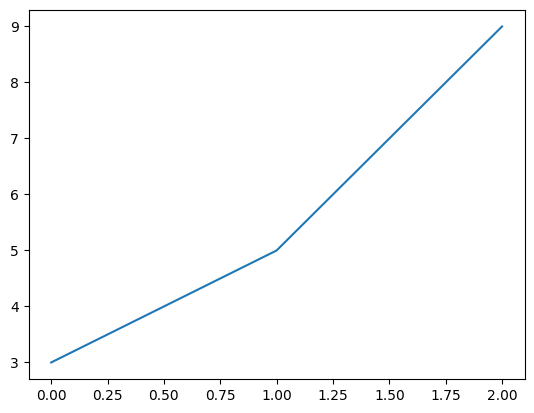

In [20]:
x_val = [0, 1, 2]
y_val = [3, 5, 9]
plt.plot(x_val, y_val)


<h4>Q1. How have the prevalence rates of hypertension, heart disease, stroke, and other health conditions (such as BMI, smoking status) changed across different age groups or genders over the past 20-30 years?</h4>

In [21]:
df['year'] = 2023 - df['age']
# Assuming the dataset was collected in 2023 and 'age' is current

In [26]:
hypertension_per_year = df.groupby('year')['hypertension'].mean().reset_index()


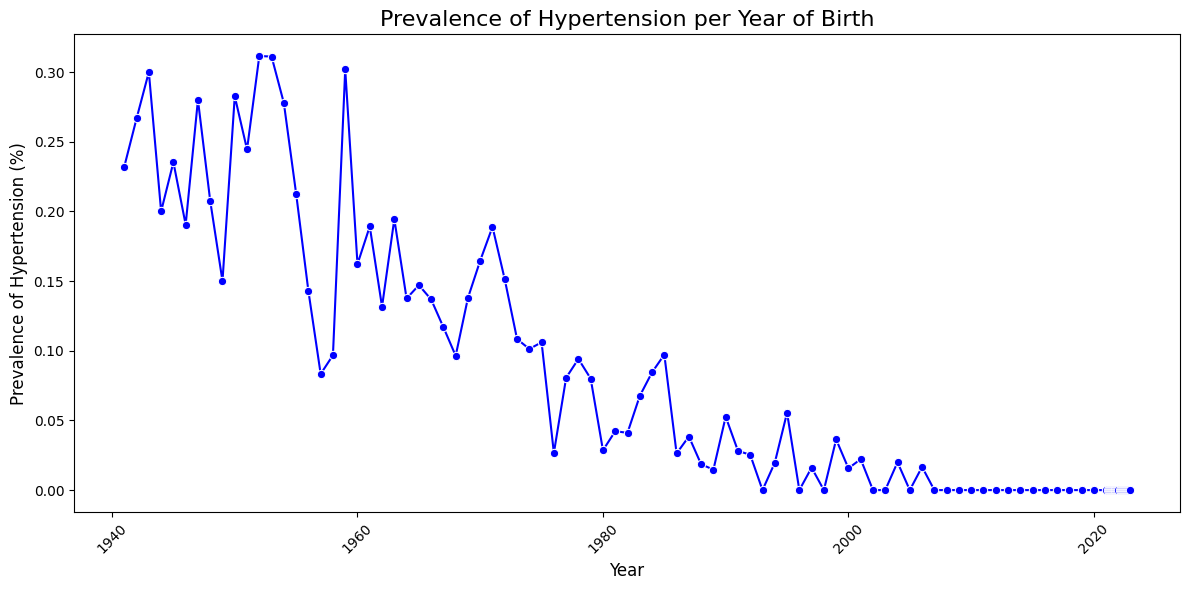

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hypertension_per_year, x='year', y='hypertension', marker='o', color='blue')

# Add title and labels
plt.title('Prevalence of Hypertension per Year of Birth', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Prevalence of Hypertension (%)', fontsize=12)

# for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<h5> OBSERVATIONS<h5>

<h5>1.The graph shows the prevalence of hypertension over different years of birth.
As expected, there is an increase in prevalence of hypertension with older generations, reflecting the natural aging process and the higher risk of hypertension with age.


2.People born earlier (e.g., pre-1990) show higher rates of hypertension, likely due to age and long-term exposure to lifestyle factors.

3.By limiting the x-axis range from 1990 to 2021, we focus on recent cohorts, helping to zoom into changes in health patterns in the current population.
This zoomed-in view can highlight how recent medical advancements, public health campaigns, or lifestyle changes are influencing hypertension trends.</h5>




<h4>Q2.Comparison of the prevalence of health conditions (e.g., hypertension, heart disease, stroke) across different regions<h4>

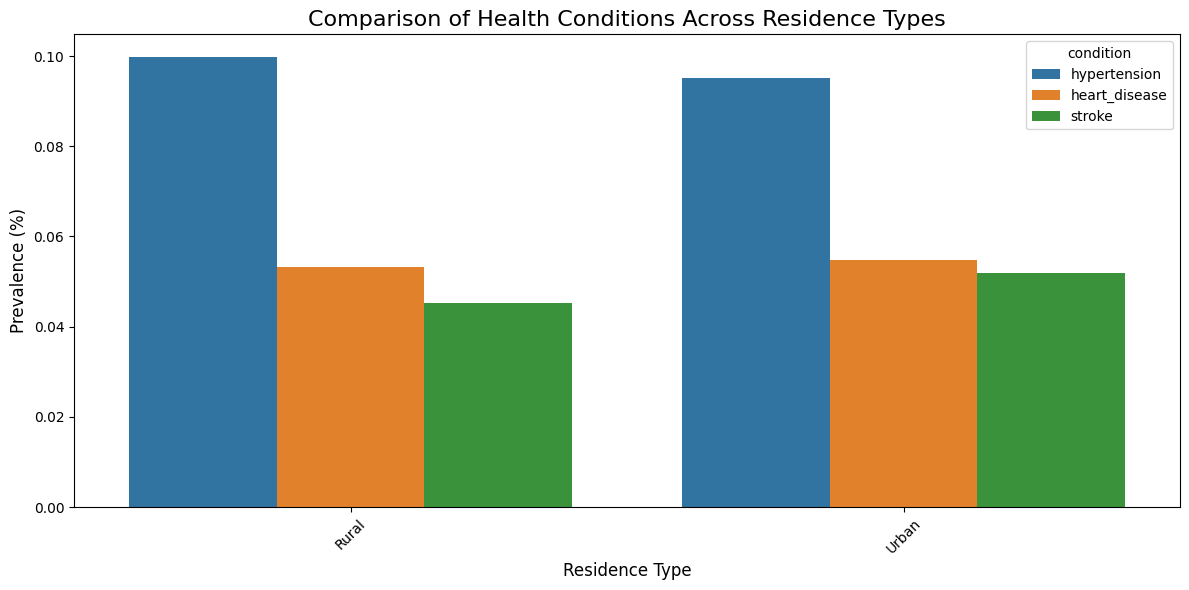

In [41]:
df_health = df[['Residence_type', 'hypertension', 'heart_disease', 'stroke']]

# Grouping Residence_type and calculating the mean prevalence for each condition
df_grouped = df_health.groupby('Residence_type').mean().reset_index()

# Melt the data to get the conditions in a single column for better understanding
df_melted = df_grouped.melt(id_vars='Residence_type', value_vars=['hypertension', 'heart_disease', 'stroke'],
                            var_name='condition', value_name='prevalence')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Residence_type', y='prevalence', hue='condition')

# Add title and labels
plt.title('Comparison of Health Conditions Across Residence Types', fontsize=16)
plt.xlabel('Residence Type', fontsize=12)
plt.ylabel('Prevalence (%)', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<h5>OBSERVATIONS<h5>
1.  Urban areas may show higher prevalence of heart disease, which is often linked to sedentary lifestyles, unhealthy diets, and higher pollution levels. The availability of healthcare services in urban areas might lead to better diagnosis, but lifestyle factors could contribute to higher rates.


2.   Rural areas may show higher prevalence of stroke and hypertension. Limited access to healthcare, fewer health awareness programs, and lifestyle factors (such as poor diet and less physical activity) may lead to these higher rates. Lack of early diagnosis and treatment may contribute to the higher prevalence of stroke in rural populations.

<h4>Q3.Does the prevalence of health conditions (hypertension, heart disease, stroke) vary based on age or BMI, and how does it differ between males and females in the healthcare dataset?</h4>

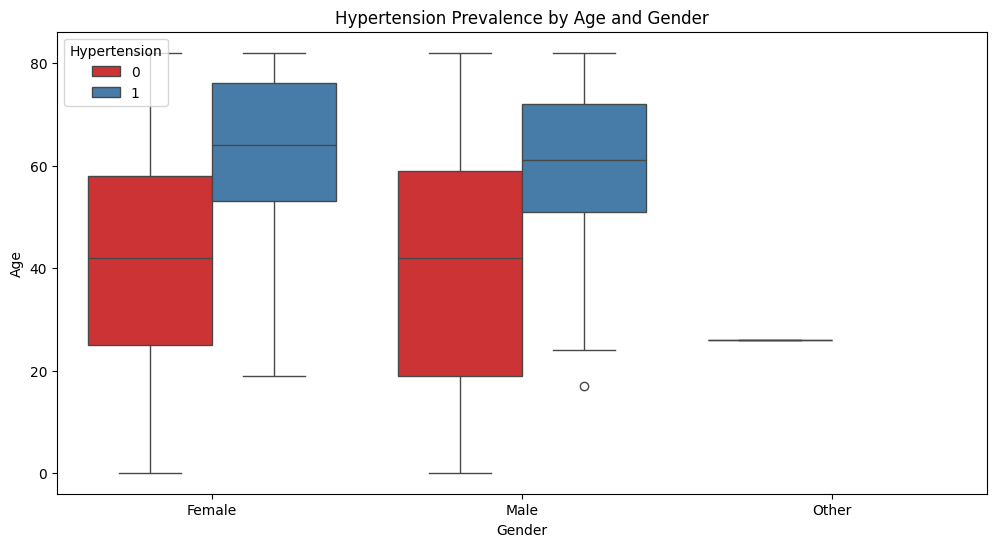

In [43]:
df['gender'] = df['gender'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['heart_disease'] = df['heart_disease'].astype('category')
df['stroke'] = df['stroke'].astype('category')

#  Hypertension by Age and Gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='gender', y='age', hue='hypertension', palette='Set1')
plt.title('Hypertension Prevalence by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Hypertension', loc='upper left')
plt.show()

<h5>OBSERVATIONS</h5>

1.  The female group (hue = "gender") shows a higher concentration of individuals with hypertension in the older age ranges. The box for hypertensive women likely starts rising as age increases (post-menopausal women are more prone to hypertension).
2.   For non-hypertensive women, the age distribution could show a broader range, with many younger females having no hypertension.
3.   The median age for hypertensive females may be slightly lower than for hypertensive males, suggesting that hypertension might develop earlier in females (possibly due to hormonal factors or menopause).

<h4>Q4.How does the prevalence of hypertension vary across different age groups and smoking status in the healthcare dataset?</h4>

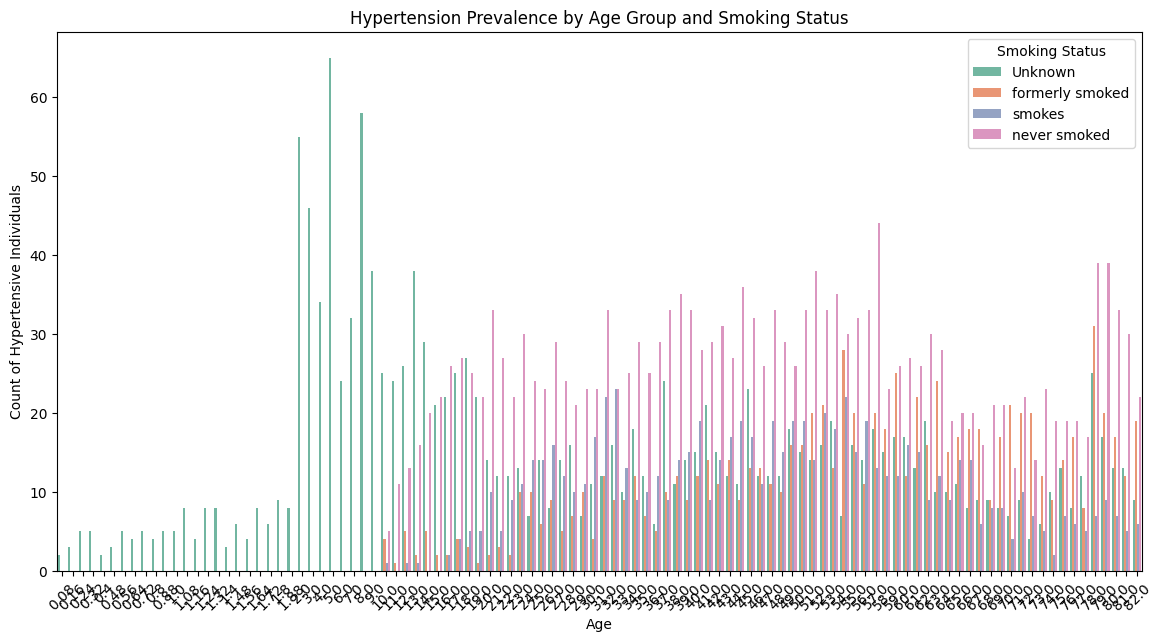

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6952\647248207.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hypertension_by_age_smoking = df.groupby(['age', 'smoking_status', 'hypertension']).size().unstack(fill_value=0)


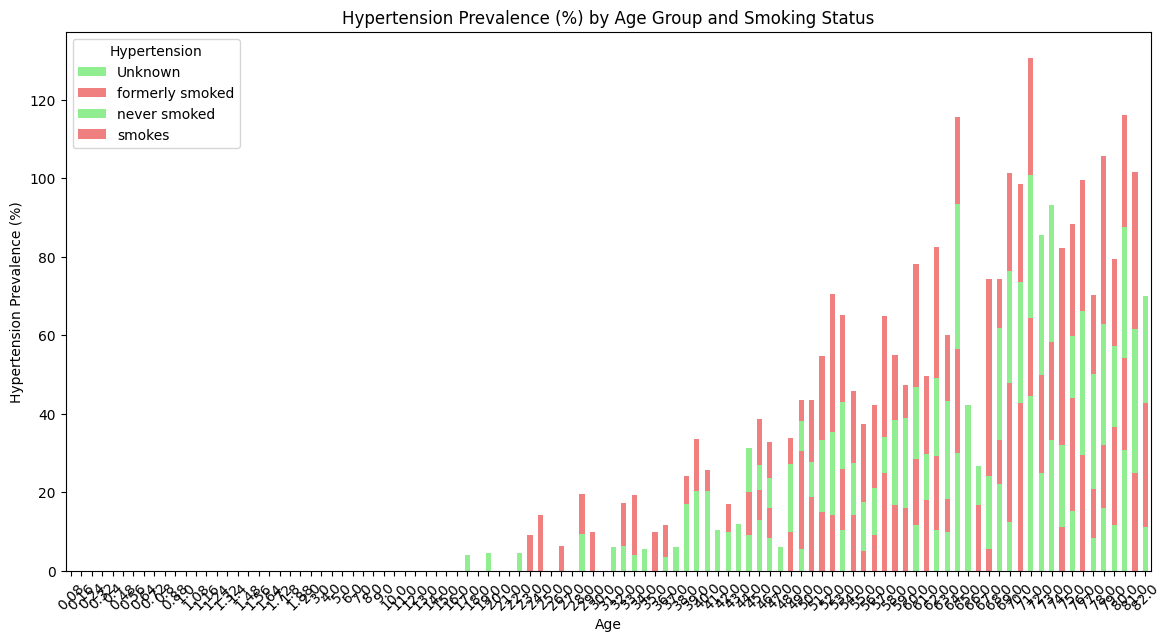

In [46]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='age', hue='smoking_status', palette='Set2', dodge=True)
plt.title('Hypertension Prevalence by Age Group and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Count of Hypertensive Individuals')
plt.legend(title='Smoking Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Calculate the count of hypertensive and non-hypertensive individuals by age group and smoking status
hypertension_by_age_smoking = df.groupby(['age', 'smoking_status', 'hypertension']).size().unstack(fill_value=0)

# Calculate the percentage of hypertensive individuals
hypertension_by_age_smoking['Hypertension Prevalence (%)'] = (hypertension_by_age_smoking[1] / hypertension_by_age_smoking.sum(axis=1)) * 100

# Plotting the proportion of hypertensive individuals
plt.figure(figsize=(14, 7))
hypertension_by_age_smoking['Hypertension Prevalence (%)'].unstack().plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], ax=plt.gca())
plt.title('Hypertension Prevalence (%) by Age Group and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Hypertension Prevalence (%)')
plt.xticks(rotation=45)
plt.legend(title='Hypertension', loc='upper left')
plt.show()

OBSERVATIONS

1.As we move to older age groups (e.g., 60-69, 70-79, and 80+), the number of hypertensive individuals increases, indicating that age is a strong risk factor for developing hypertension.

2.The younger age groups (e.g., 18-29, 30-39) show much lower counts of hypertension, which is expected since hypertension tends to be less common in younger populations.

3.Among all age groups, smokers and formerly smoked individuals tend to have a higher count of hypertensive individuals compared to those who never smoked. This suggests that smoking is a significant contributor to the development of hypertension.

4.In younger age groups (18-29), although the overall number of hypertensive individuals is low, smokers still show a higher count compared to non-smokers, indicating that smoking may increase the risk of hypertension even at a younger age.

<h4>Q5.Has there been a growing focus on treating certain health conditions (e.g., hypertension, heart disease, stroke) over the years, compared to other conditions, in the healthcare dataset?

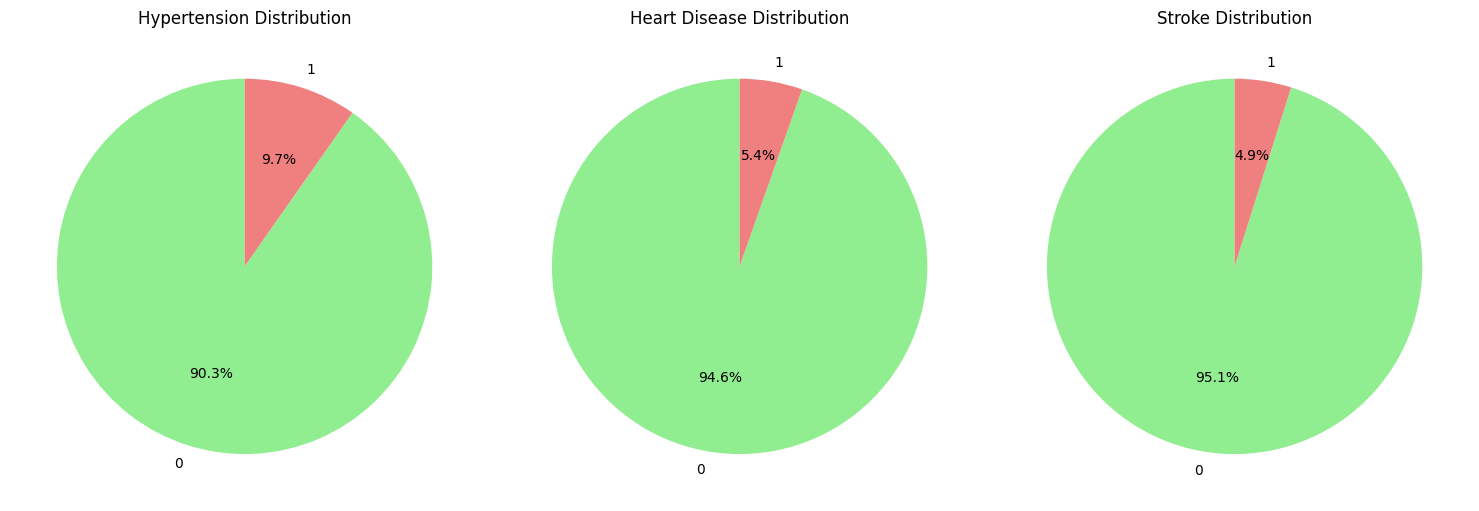

In [59]:
condition_counts = {
    'Hypertension': df['hypertension'].value_counts(),
    'Heart Disease': df['heart_disease'].value_counts(),
    'Stroke': df['stroke'].value_counts(),
}

# Plotting Pie Charts for each condition
plt.figure(figsize=(15, 5))

# Create a subplot for each condition
conditions = ['Hypertension', 'Heart Disease', 'Stroke']
for i, condition in enumerate(conditions):
    plt.subplot(1, 3, i+1)  # 1 row, 3 columns
    condition_data = condition_counts[condition]
    
    # Plot a pie chart for the current health condition
    plt.pie(condition_data, labels=condition_data.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
    plt.title(f'{condition} Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<h5>OBSERVATIONS

1.Prevalence of Hypertension: The pie chart will show what proportion of individuals in the dataset are hypertensive (those with hypertension = 1) versus those who are not (those with hypertension = 0).

2.If the portion with hypertension is large, it indicates that a significant number of individuals in the dataset are suffering from high blood pressure, which is a common health condition, especially with advancing age.

3.If the portion without hypertension is large, this suggests that most individuals in the dataset are either normotensive (normal blood pressure) or not diagnosed with hypertension.

<h4>Q6.How are the features age, BMI, and average glucose level distributed across individuals with and without hypertension, and are there any noticeable correlations between these variables that may suggest risk factors for hypertension?

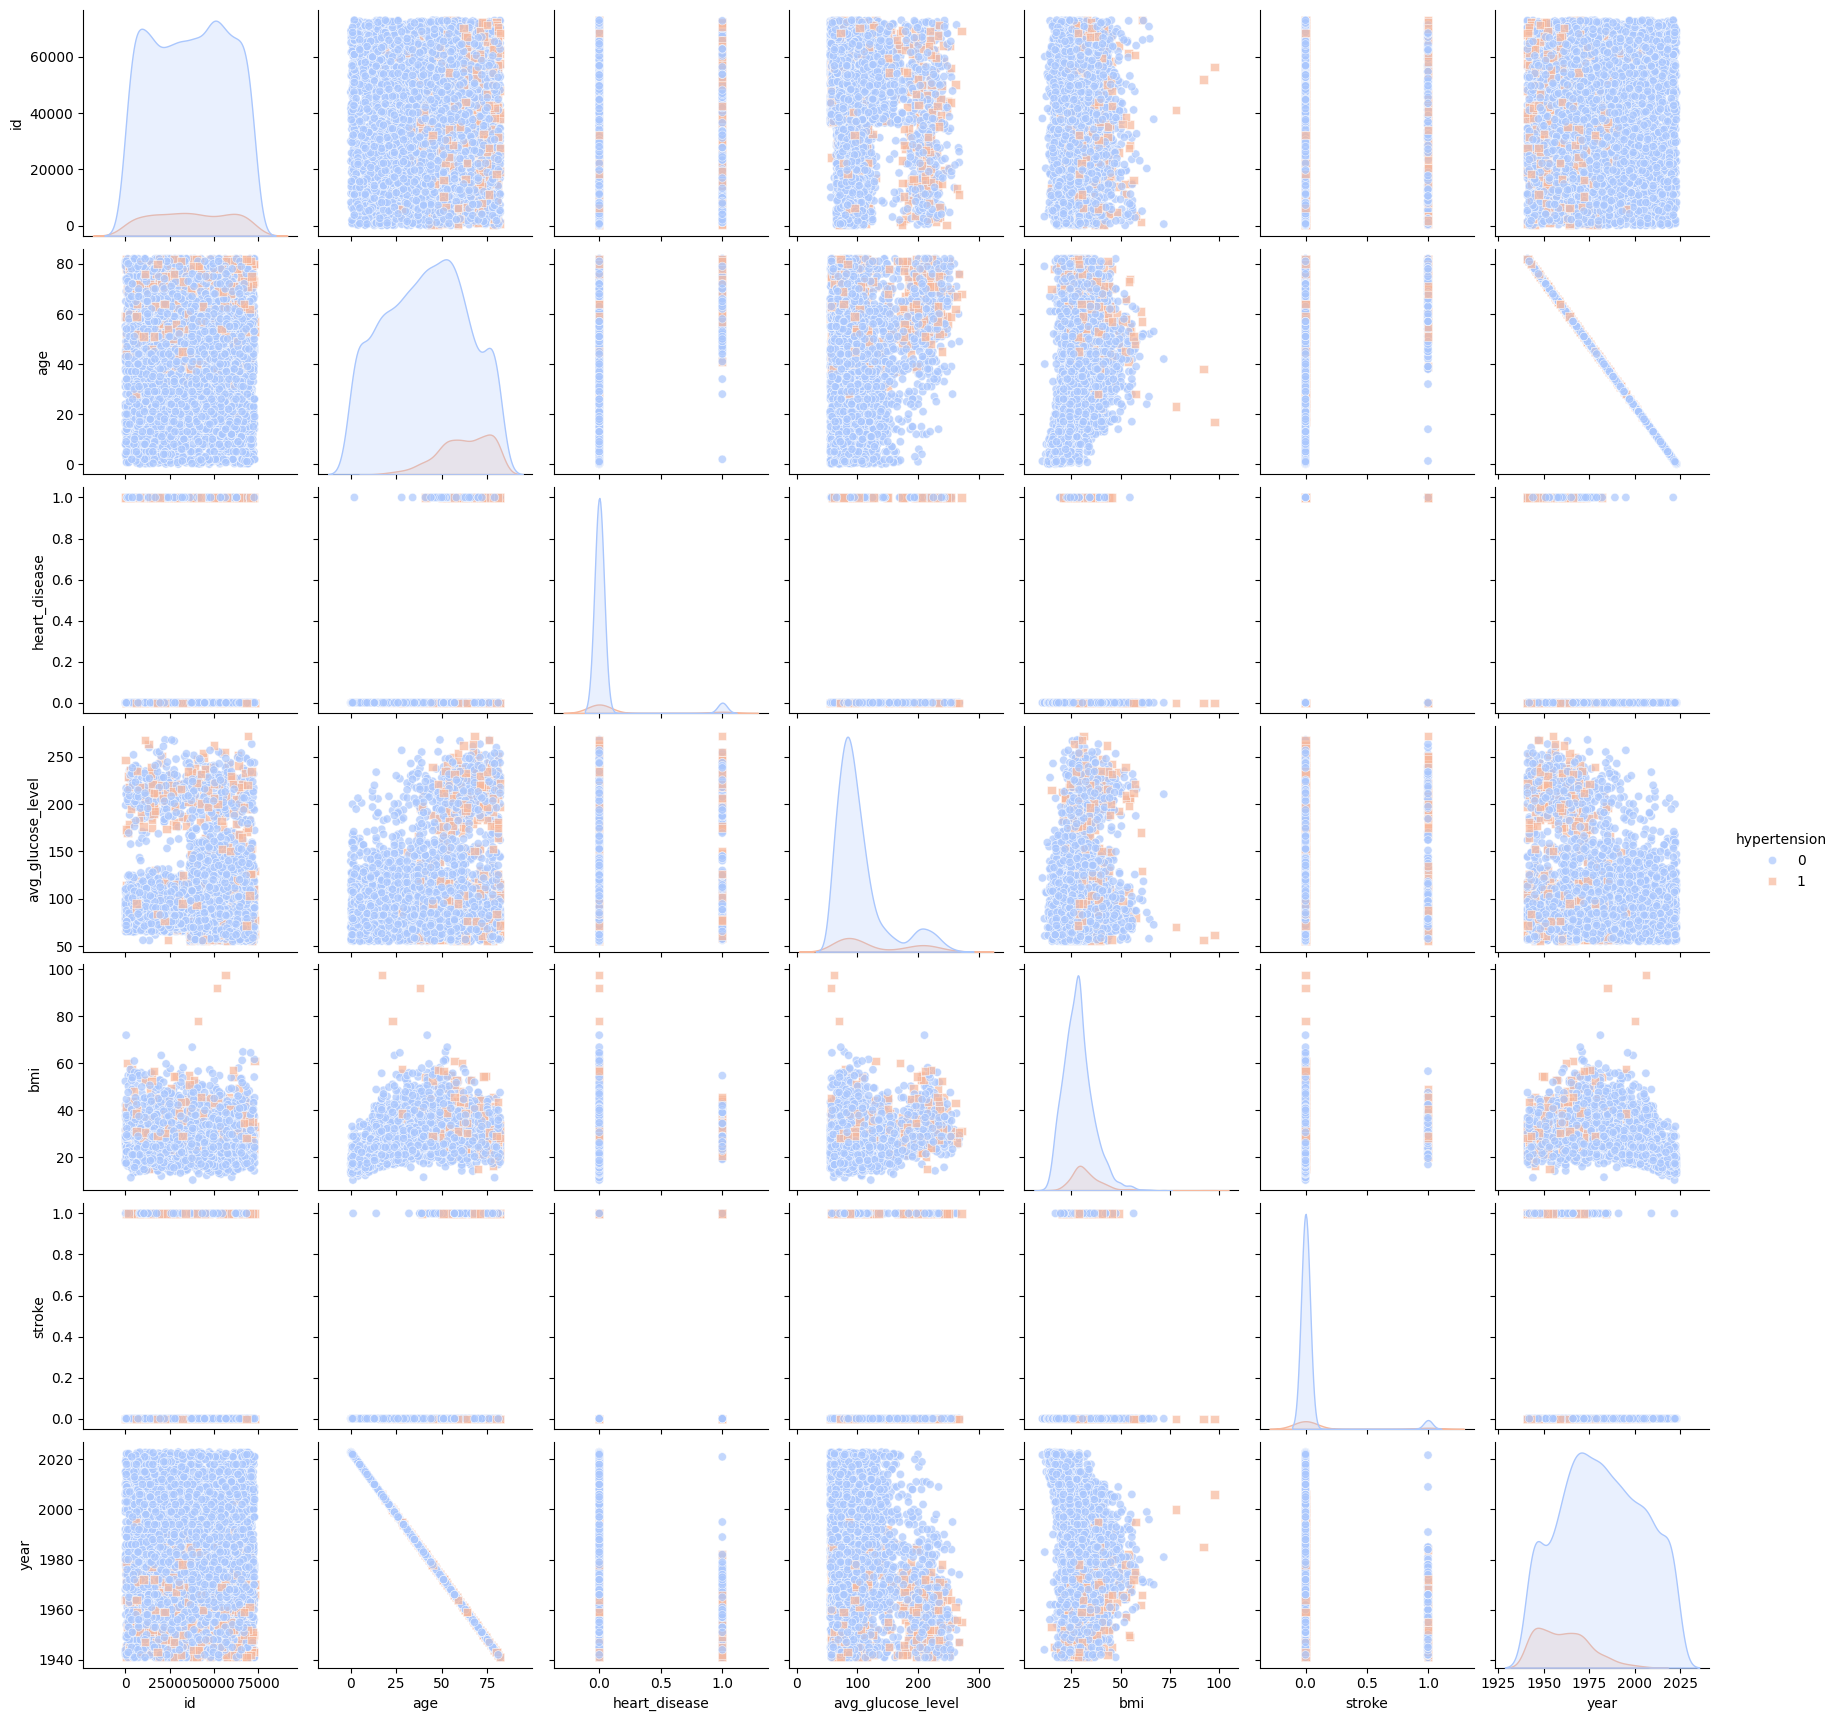

In [61]:
sns.pairplot(df, 
             hue='hypertension',    # Color points based on hypertension status (0 = No, 1 = Yes)
             palette='coolwarm',    # Color palette for hypertension status
             markers=['o', 's'],    # Different markers for individuals with and without hypertension
             diag_kind='kde',       # KDE plots on the diagonal instead of histograms
             plot_kws={'alpha': 0.7})  # Transparency for scatterplots

# Display the plot
plt.show()

<h5>OBSERVATIONS

1.In the scatter plots between age and other features (like bmi and avg_glucose_level), you may notice that individuals with hypertension  tend to be older. Specifically, hypertensive individuals could be more concentrated in the higher age ranges, suggesting that age may be a risk factor for hypertension.


2.The KDE plot on the diagonal for age might show a higher density of older individuals among those with hypertension, implying a correlation between age and the likelihood of having hypertension.

<H2>DATA ENCODING

<h5>Data encoding is a crucial step in data preprocessing, especially when working with machine learning models. It is the process of converting categorical data (non-numeric data) into numerical format so that the machine learning algorithms can process it.



<h4>TYPES

1. Label Encoding: Useful for ordinal data or when there's a need to represent categories numerically (e.g., small = 1, medium = 2, large = 3).
2. One-Hot Encoding: Ideal for nominal categorical variables, creating separate columns for each unique category.
3. Binary Encoding: Used for high cardinality categories, reducing the number of columns compared to one-hot encoding.
4. Target Encoding: Maps categories to the mean of the target variable, often useful when the categories have a relationship with the target variable.

<H4>ADVANTAGES

1. Enables Model Compatibility
Machine Learning Algorithms Require Numeric Input: Many machine learning algorithms (e.g., linear regression, decision trees, neural networks) cannot work with categorical variables directly. Encoding transforms categorical data into a numeric format that can be understood by these models.
Uniform Representation: For example, converting text labels into numeric codes (like encoding "Yes" = 1 and "No" = 0) helps in creating a uniform input dataset for the model.
2. Improved Performance
Easier to Process: Computers process numbers more efficiently than strings. Converting categorical features into numerical representations can speed up model training and predictions.
Better Handling of Categorical Variables: Some encoding methods (like one-hot encoding or label encoding) allow models to effectively use categorical features without introducing unnecessary complexity or assumptions.
3. Handling Non-Numeric Data
Flexibility: Many real-world datasets contain non-numeric data (e.g., gender, product categories, locations, etc.), which cannot be used directly in algorithms. Encoding allows these non-numeric attributes to be transformed into a form that algorithms can work with.
4. Capturing Relationships Between Categories
One-Hot Encoding: For categorical variables without ordinal relationships (e.g., color of a car, country of origin), one-hot encoding ensures that each category is represented as a separate binary feature, maintaining independence between categories.
Label Encoding: For ordinal variables (e.g., rating scales like low, medium, high), label encoding preserves the order and relationships (e.g., low = 0, medium = 1, high = 2), which can be useful for models that can take advantage of the ordered nature.
5. Handling Missing Data
Imputation and Encoding: When combined with imputation strategies, encoding helps fill missing values in a way that doesn't break the model's understanding of the data. For example, missing categories can be encoded as a separate value, or a placeholder can be used.

<H4>DISADVANTAGES

1. Loss of Information (for Label Encoding)
Assumed Order: Label Encoding assigns a numeric value to each category (e.g., low = 0, medium = 1, high = 2). This method assumes an ordinal relationship between the categories, which may not always be valid. For example, encoding "red", "blue", and "green" with numeric values could mislead the model into assuming an ordered relationship, which is incorrect since these colors are nominal and do not have a natural ordering.
2. High Dimensionality (for One-Hot Encoding)
Increased Feature Space: One-Hot Encoding can lead to a significant increase in the dimensionality of the dataset, especially when dealing with categorical variables that have a large number of distinct categories.One-hot encoding produces sparse matrices (lots of 0s), which can increase the storage and computational requirements for both training and inference, leading to slower model performance, especially for algorithms that struggle with high-dimensional data (e.g., linear models, KNN, etc.).
3. Overfitting Risk (for High Cardinality Categorical Variables)
Overfitting in Tree-based Models: When using target encoding or encoding with high cardinality variables, there is a risk of overfitting, especially if the encoding is done poorly. Target encoding assigns category means based on the target variable, which can lead to leakage of information if not done carefully. This is especially problematic in small datasets where the categories might not have a large enough sample size to generalize effectively. When target encoding is applied incorrectly, it may allow information from the target variable to "leak" into the feature variables, leading to overly optimistic model performance during training, but poor performance on unseen data.
4. Increased Computational Complexity
Memory Consumption: As mentioned earlier, high-cardinality categorical variables can increase the size of the dataset due to the large number of new columns being added (particularly with one-hot encoding). This increase in feature space can lead to a higher memory requirement, which may slow down training and increase the time complexity for both training and inference.
5. Loss of Interpretability (for Complex Encoding Methods)
Complexity in Interpretation: After applying certain encoding techniques (e.g., one-hot encoding, target encoding, or binary encoding), the resulting dataset may become harder to interpret. For instance, after one-hot encoding, multiple columns are created, which can make it more challenging to trace the influence of the original categorical feature.
 For machine learning models, determining the importance of the original categorical feature can become more difficult after encoding. The relationship between the encoded features and the target variable might not be immediately obvious.

1. Convert Residence_type column to Rural/Urban col (0 = rural, 1 =urban)

In [62]:
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,year,Urban/Rural
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1956.0,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1962.0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1943.0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1974.0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1944.0,0


2. Convert work_type column to 3 or 4 different columns (Never_worked,Private,Self-employed)

In [63]:
df_encoded = pd.get_dummies(df['work_type'], prefix='', prefix_sep='')
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('work_type', axis=1)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,year,Urban/Rural,Govt_job,Never_worked,Private,Self-employed,children
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.600000,formerly smoked,1,1956.0,1,False,False,True,False,False
1,51676,Female,61.0,0,0,Yes,Rural,202.21,28.893237,never smoked,1,1962.0,0,False,False,False,True,False
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.500000,never smoked,1,1943.0,0,False,False,True,False,False
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.400000,smokes,1,1974.0,1,False,False,True,False,False
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.000000,never smoked,1,1944.0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Urban,83.75,28.893237,never smoked,0,1943.0,1,False,False,True,False,False
5106,44873,Female,81.0,0,0,Yes,Urban,125.20,40.000000,never smoked,0,1942.0,1,False,False,False,True,False
5107,19723,Female,35.0,0,0,Yes,Rural,82.99,30.600000,never smoked,0,1988.0,0,False,False,False,True,False
5108,37544,Male,51.0,0,0,Yes,Rural,166.29,25.600000,formerly smoked,0,1972.0,0,False,False,True,False,False


3. Convert smoking_status columns to 3 

In [64]:
smoking_status_encoded = pd.get_dummies(df['smoking_status'], prefix='', prefix_sep='')
df = pd.concat([df, smoking_status_encoded], axis=1)
df = df.drop('smoking_status', axis=1)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,...,Urban/Rural,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.600000,1,...,1,False,False,True,False,False,False,True,False,False
1,51676,Female,61.0,0,0,Yes,Rural,202.21,28.893237,1,...,0,False,False,False,True,False,False,False,True,False
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.500000,1,...,0,False,False,True,False,False,False,False,True,False
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.400000,1,...,1,False,False,True,False,False,False,False,False,True
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.000000,1,...,0,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Urban,83.75,28.893237,0,...,1,False,False,True,False,False,False,False,True,False
5106,44873,Female,81.0,0,0,Yes,Urban,125.20,40.000000,0,...,1,False,False,False,True,False,False,False,True,False
5107,19723,Female,35.0,0,0,Yes,Rural,82.99,30.600000,0,...,0,False,False,False,True,False,False,False,True,False
5108,37544,Male,51.0,0,0,Yes,Rural,166.29,25.600000,0,...,0,False,False,True,False,False,False,True,False,False


4. All these columns should only have values 0 or 1 

In [67]:
for column in df.columns:
    if column not in ['id', 'hypertension', 'heart_disease', 'stroke']:  # Leave original columns
        df[column] = df[column].apply(lambda x: 1 if x == 1 else 0)

# Verify the final DataFrame
print("\nAfter ensuring 0 and 1 values for encoded columns:")
df


After ensuring 0 and 1 values for encoded columns:


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,...,Urban/Rural,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,9046,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,51676,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,31112,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,60182,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,1665,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5106,44873,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5107,19723,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5108,37544,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


5. Create a new variable to store the dataset for data model, and drop the Residence_type, work_type and smoking_status columns.

The code will give error because the 'residence_type' column is split into urban/rural and the 'work_type' is split into never smoked, formerly smoked and smokes

In [68]:
df_model = df.drop(columns=['Residence_type', 'work_type', 'smoking_status']) # error occured because these columns are already split into different columns and they are automatically dropped
df_model

KeyError: "['work_type', 'smoking_status'] not found in axis"